In [1]:
import tensorflow.keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import load_model

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print('train data dim:', x_train.shape)
print('test data dim:', x_test.shape)
print('test label dim:', y_test.shape)

print('max of training data:', np.max(x_train))

train data dim: (60000, 28, 28)
test data dim: (10000, 28, 28)
test label dim: (10000,)
max of training data: 255


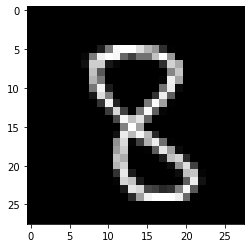

label: 8


In [5]:
rand_num = np.random.randint(60000)
plt.imshow(x_train[rand_num], cmap='gray')
plt.show()
print('label:', y_train[rand_num])

In [6]:
x_train = np.reshape(x_train, [-1, 28*28])
x_test = np.reshape(x_test, [-1, 28*28])

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
import tensorflow.keras.utils as utils

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

### Defining the model
- Hidden Layer 1: fully connected + Relu Activation (e.g. 512 neurons)
- Hidden Layer 2: fully connected + relu activation (e.g 512 neurons)
- Output Layer: fully connected + softmax activation

In [9]:
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer=RandomNormal(0,0.01)))
model.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(0,0.01)))
model.add(Dense(10, activation='softmax', kernel_initializer=RandomNormal(0,0.01)))

In [10]:
# Use Categorical Cross-Entropy as loss function
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train,
                   batch_size = 32,
                   epochs = 3,
                   verbose = 1,
                   validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 7s 148us/sample - loss: 2.2128 - accuracy: 0.3137 - val_loss: 1.6838 - val_accuracy: 0.5543
Epoch 2/3
48000/48000 [==============================] - 7s 137us/sample - loss: 0.8431 - accuracy: 0.7545 - val_loss: 0.4975 - val_accuracy: 0.8577
Epoch 3/3
48000/48000 [==============================] - 7s 142us/sample - loss: 0.4464 - accuracy: 0.8730 - val_loss: 0.3748 - val_accuracy: 0.8931
